In [3]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [6]:
!pip install dask[dataframe]

In [11]:
# data manupilation
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix


# data viz
import matplotlib.pyplot as plt
import seaborn as sns

# model building
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from category_encoders.count import CountEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity


# os library
from pathlib import Path

# kaggle
import kagglehub

# parallel computing
import dask.dataframe as dd



In [5]:
kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")

100%|██████████| 639M/639M [00:07<00:00, 89.8MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1'

In [8]:
dataset_dir = Path("/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1")

song_file = dataset_dir / 'Music Info.csv'
user_history_file = dataset_dir / 'User Listening History.csv'

In [9]:
# songs_data
song_df = pd.read_csv(song_file, usecols = ["track_id", "name", "artist", "spotify_preview_url"])
song_df.head()

,track_id,name,artist,spotify_preview_url
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...


In [12]:
user_df = dd.read_csv(user_history_file)
user_df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [13]:
user_df.npartitions

9

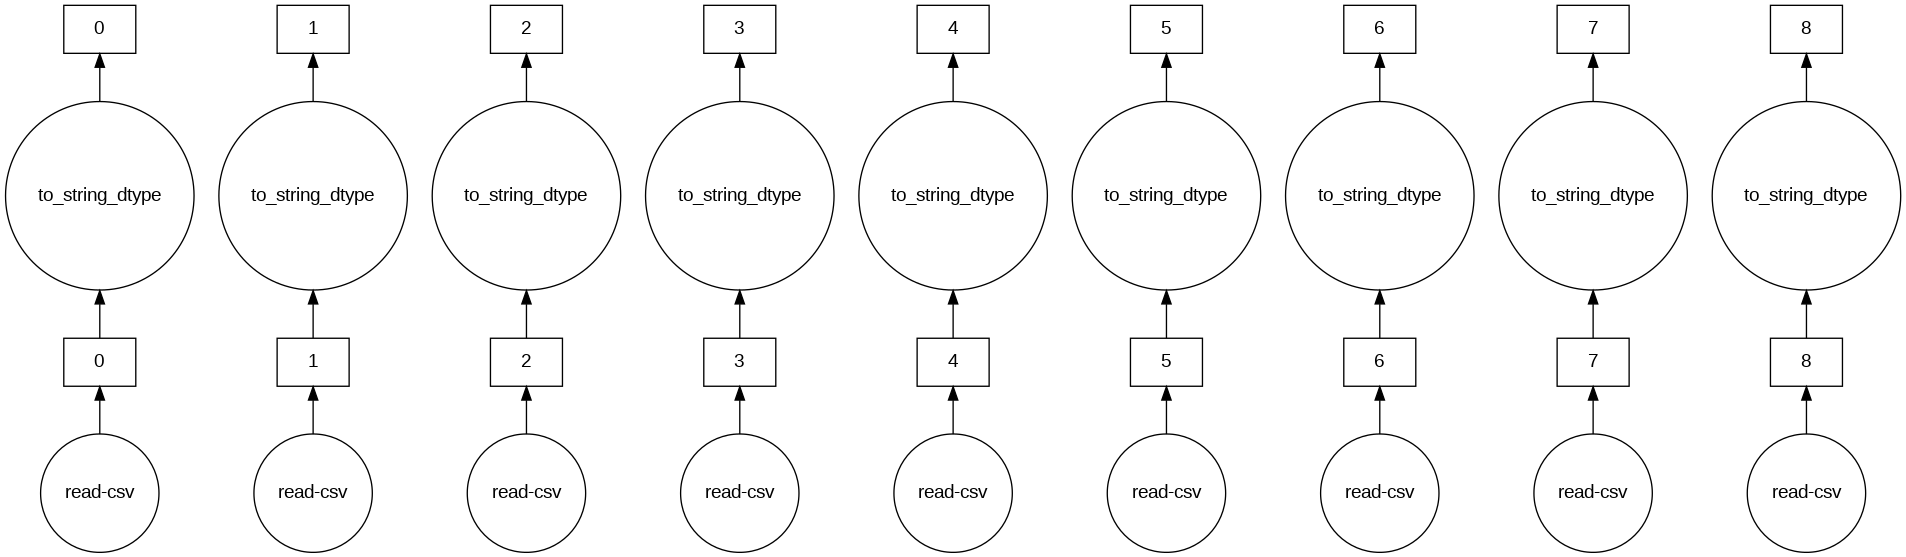

In [15]:
user_df.visualize( tasks = True)

In [20]:
num_tracks = user_df["track_id"].nunique().compute()
num_users = user_df["user_id"].nunique().compute()
print(f"Unique tracks: {num_tracks}, Unique users: {num_users}")

Unique tracks: 30459, Unique users: 962037


In [25]:
unique_track_ids = user_df["track_id"].unique().compute().tolist()
unique_track_ids

['TRLXSNR128F429361D',
 'TRPUGUW128F426BF6F',
 'TRISTWT128F1488FBB',
 'TRKPWGR128E078EE06',
 'TRXQJWK128F146DF76',
 'TRGASNY128F14696B0',
 'TRSQWMI128F932FC8A',
 'TRBVNWT128F93173BA',
 'TRBHQZM128F42A52D2',
 'TRSWJHK128F429EA6F',
 'TRRUZLF128F42396D0',
 'TRMPCGW128F92E0670',
 'TRJNMNC128F427ED16',
 'TRWCIAX128F42925BD',
 'TRGVKBK128F429EA2D',
 'TRGRPEU128F932BD78',
 'TRANEZZ128F92FFC06',
 'TRRYLYK128F92F89F6',
 'TRQGHWL128EF33FB48',
 'TRWZFIC128F933BCA3',
 'TRKSEEY12903CCD312',
 'TRBTCYJ128F92F9586',
 'TRQPRPK12903CCF3B6',
 'TRJSQQT128F149F9B4',
 'TREWPIM128F4261B51',
 'TRMZPXZ128F92F3495',
 'TRTGEVW128F14979BB',
 'TROUMHD128F9355B89',
 'TRKRNZF12903CB52BC',
 'TRBSBCX128F92DEF11',
 'TRXHDTA128F42A077A',
 'TRSJBLT128F429EA02',
 'TRTJYDU128F92E49EE',
 'TRDTMGK12903CC557F',
 'TRBOAJY128F14979B5',
 'TRBYDXV128F424888B',
 'TRCIOVJ128F429EB51',
 'TRYBFNR128F426BE3D',
 'TRWOYHS128F931EB5A',
 'TRNNLYM128F92EDE7F',
 'TRATHTH128F42BC347',
 'TRXERRS128F42969E4',
 'TRZPVLJ128F148D2F7',
 'TRGTVVB12

In [27]:
filtered_song_df = song_df[song_df["track_id"].isin(unique_track_ids)].reset_index(drop=True)
filtered_song_df.head()

,track_id,name,artist,spotify_preview_url
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...
2,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...
3,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...
4,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...


In [29]:
user_df['playcount'] = user_df['playcount'].astype(np.float64)

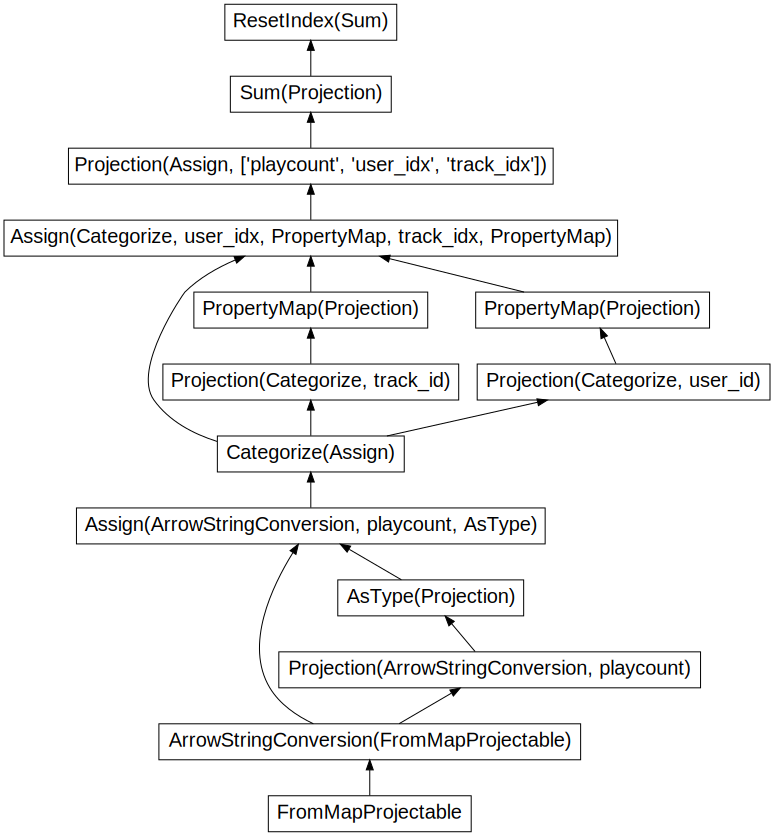

In [40]:
(user_df.groupby(['track_idx', 'user_idx'])['playcount'].sum().reset_index()).visualize()

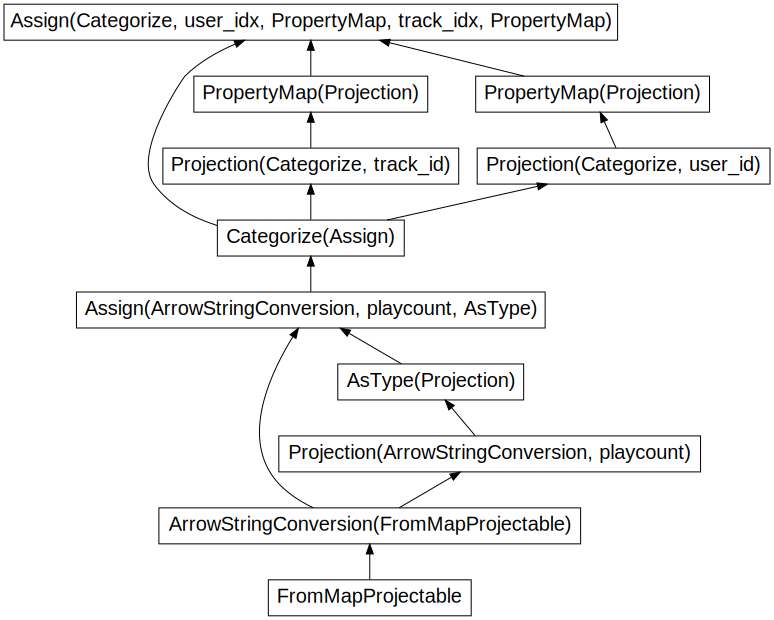

In [36]:
user_df.visualize()

In [30]:
user_df = user_df.categorize(columns=["user_id", "track_id"])

In [31]:
user_df = user_df.assign(
    user_idx=user_df["user_id"].cat.codes,
    track_idx=user_df["track_id"].cat.codes
)

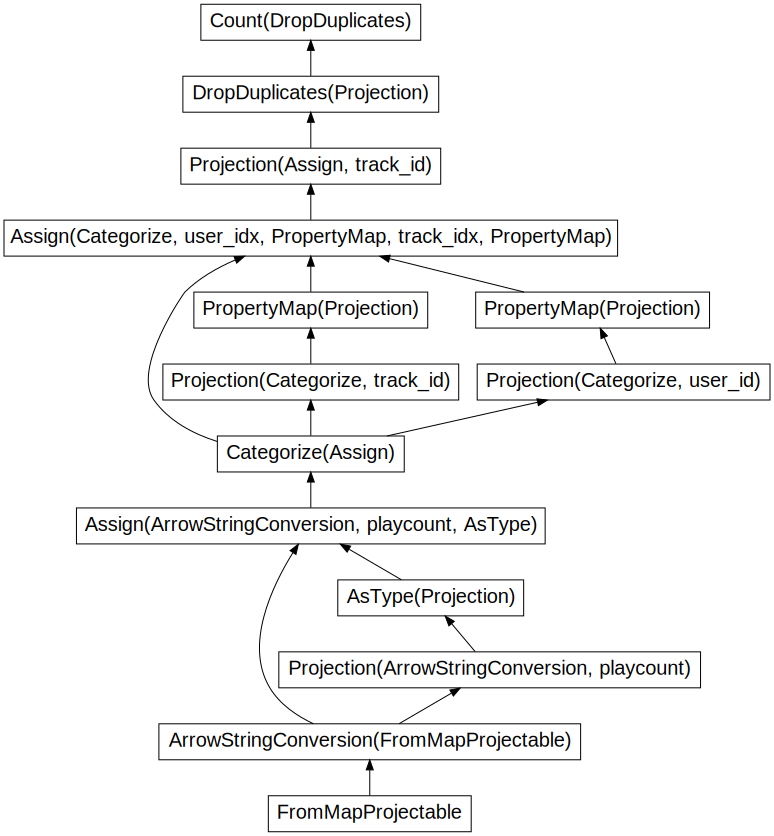

In [39]:
user_df["track_id"].nunique().visualize()

In [32]:
interaction_df = user_df.groupby(['track_idx', 'user_idx'])['playcount'].sum().reset_index().compute()

In [38]:
user_df[user_df["playcount"] > 100].compute().head()  # Executes, but doesn't visualize
(user_df[user_df["playcount"] > 100].groupby("user_id").mean()).visualize()

,track_id,user_id,playcount,user_idx,track_idx
2715,TRMAEHV128F427ECE6,ea64e003562d2f0f39e5a7dd84af5b1969e0fea3,167.0,880719,14774
2940,TRYUTWL128F1453E56,ec25e3d78ea8374869a772dc58bb903528a3c9cc,247.0,887401,29353
12437,TRONYHY128F92C9D11,25aa0ec046aa788bf5366d7b7bf81c17fa022e46,111.0,140876,17456
13769,TRONYHY128F92C9D11,0fa40519d4e6f85c9eaddcdf107e8f6d431942b5,128.0,58149,17456
14742,TRVEFWL12903CF7576,1774d9180bdaf049d58d9bc88c91961a917adec3,246.0,87423,25150


In [33]:
rows = interaction_df["track_idx"]
cols = interaction_df["user_idx"]
data = interaction_df["playcount"]

interaction_matrix = csr_matrix((data, (rows, cols)), shape=(num_tracks, num_users))

print("Sparse Matrix Shape:", interaction_matrix.shape)
print("Non-zero Elements:", interaction_matrix.nnz)

Sparse Matrix Shape: (30459, 962037)
Non-zero Elements: 9711301


In [34]:
def recommend_by_collaboration(song_title, user_data, song_metadata, sparse_matrix, top_k=5):
    song_row = song_metadata[song_metadata["name"] == song_title]
    if song_row.empty:
        raise ValueError("Song not found in dataset.")

    track_id = song_row["track_id"].values[0]
    track_idx = np.where(user_data['track_id'].cat.categories == track_id)[0][0]

    input_vector = sparse_matrix[track_idx]
    similarity = cosine_similarity(input_vector, sparse_matrix).ravel()

    top_indices = np.argsort(similarity)[-top_k-1:][::-1]
    top_scores = similarity[top_indices]
    top_track_ids = user_data['track_id'].cat.categories[top_indices]

    result_df = pd.DataFrame({
        "track_id": top_track_ids,
        "similarity_score": top_scores
    })

    recommendations = (
        song_metadata[song_metadata["track_id"].isin(top_track_ids)]
        .merge(result_df, on="track_id")
        .sort_values("similarity_score", ascending=False)
        .drop(columns=["track_id", "similarity_score"])
        .reset_index(drop=True)
    )

    return recommendations

In [35]:
recommend_by_collaboration(
    song_title="Crazy in Love",
    user_data=user_df,
    song_metadata=filtered_song_df,
    sparse_matrix=interaction_matrix,
    top_k=5
)

,name,artist,spotify_preview_url
0,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...
1,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...
2,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...
3,Delirium,Satyricon,https://p.scdn.co/mp3-preview/d039120c4f5f1e8d...
4,Lunar Sea,Camel,https://p.scdn.co/mp3-preview/8bf35f13a0ece173...
5,Monday Massacre,Mr. Oizo,https://p.scdn.co/mp3-preview/4d6dbacc93e3ef7e...
